Pricing options by Monte Carlo simulation is amongst the most popular ways to price certain types of financial options. This article will give a brief overview of the mathematics involved in simulating option prices using Monte Carlo methods, Python code snippets and a few examples.

In order to simulate the price of a European call option, first we must decide on the process that the stock price follows throughout the life of the option $(T-t)$. In the financial literature stocks are said to follow geometric brownian motion. Assume that the stock price $S$, in questions pays annual dividend $q$ and has an expected return $\mu$ equal to the risk-free rate $r-q$, the volatility $\sigma$ is assumed to be constant.

The stock price can be modeled by a stochastic differential equation.

may be useful to consider an ordinary differential equation in the context of our problem. Let's consider the case when volatility is 0 i.e. the stock price can be described like a deposit in a savings account paying $\mu$ per annum The change in any given time increment is then given by
$$
d S=\mu S d t
$$
Given the price of the stock now $S_0$ we then know with certainty the price $S_T$ at given time $T$ by separating and intergrating as follows:
$$
\int_0^T \frac{d S}{S}=\int_0^T \mu d t
$$
Which gives:
$$
S_T=S_0 e^{\mu T}
$$
It may be useful to notice now that we can write the result above as $\ln \left(S_T\right)=\ln \left(S_0\right)+\int_0^T \mu d t$
However, since stock prices do exhibit randomness we need to include a stochastic term in the equation above. We can't simply integrate to get a nice result as we have in the equation above, in order to capture the randomness inherent in stock markets we add another term and are SDE is defined as follows:
$$
d S=S \mu d t+S \sigma d W(t)
$$
Where $W_t$ is a Wiener Process. The equation above is now in the form of an Ito process.

Ito's Lemma shown below, states if a random variable follows an to Process (example above) then another twice differentiable function $G$ described by the stock price $S$ and time $t$ also follows at Ito process:
(the notation below has been changed from here to keep it consistent with the equations above for the purposes of stock options)

$$
d G=\left(\frac{\partial G}{\partial S} S \mu+\frac{\partial G}{\partial t}+\frac{1}{2} \frac{\partial^2 G}{\partial S^2} S^2 \sigma^2\right) d t+\frac{\partial G}{\partial S} S \sigma d W(t)
$$

We could apply Ito's lemma to $G=S$ in order to obtain arithmetic Brownian motion, however using $G=\ln (S)$ which gives a nice property that the stock price is strictly greater than 0 . So applying Ito's lemma to $\ln (S)$ first we calculate the partial derivatives with respect to $t$ and $S$ as follows:
$$
G=\ln (S)
$$

$$
\frac{\partial G}{\partial S}=\frac{1}{S}, \frac{\partial G}{\partial t}=0, \quad \frac{\partial^2 G}{\partial S^2}=-\frac{1}{S^2}
$$
Plugging the partial derivatives into Ito's lemma gives:
$$
\begin{aligned}
d G & =\left(\frac{1}{S} S \mu+0-\frac{1}{2} \frac{1}{S^2} S^2 \sigma^2\right) d t+\frac{1}{S} S \sigma d W(t) \\
& =\left(\mu-\frac{\sigma^2}{2}\right) d t+\sigma d W(t)
\end{aligned}
$$
Therefore the distrubiton of $\ln \left(S_T\right)-\ln \left(S_0\right)=\left(\mu-\frac{\sigma^2}{2}\right) T+\sigma \sqrt{T}$

The distibution of the stock price at expiration is given by rearraging the equation above an taking the exponential of both sides:
$$
S_T=S_0 e^{\left(\mu-\frac{\sigma^2}{2}\right) d t+\sigma d W(t)}
$$
The above can also be written as:
$$
\ln \left(S_T\right)=\ln \left(S_0\right)+\int_0^t\left(\mu-\frac{\sigma^2}{2}\right) d t+\int_0^t \sigma d W(t), \quad \text { for } t \in[0, \cdots, T]
$$

Text(0.5, 1.0, 'Geometric Brownian Motion')

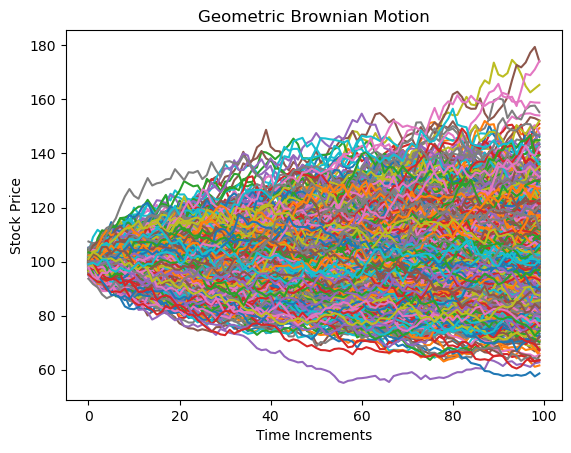

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [3]:
from scipy.stats import norm

In [4]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call



payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 3.7451887662410783
Simulated price is 3.654083353647486


There is considerable difference between the two prices due to the low sample size chosen. Let's try changing N to 100000 and running the script again.

In [6]:
N=1000000
paths= geo_paths(S, T, r, q,sigma, steps, N)
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.exp(-r*T)*np.mean(payoffs)

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 3.7451887662410783
Simulated price is 3.872972225636863


A visual representation of what is happening above

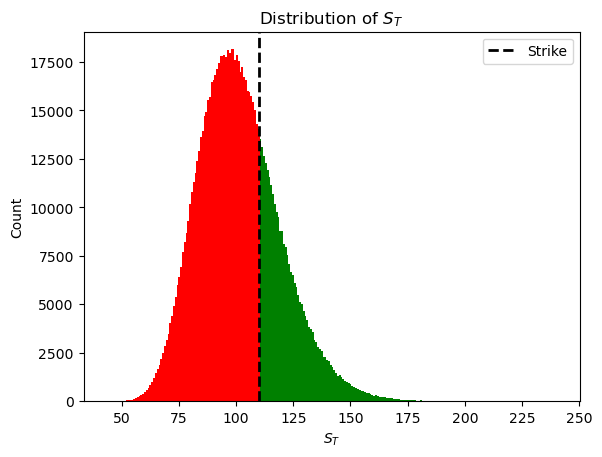

In [7]:
n, bins, patches = plt.hist(paths[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

The Monte Carlo Algorithm prices the option as call $ =e^{-r T}\left[\frac{1}{N} \sum_{i=1}^N\left(S_T-K\right)^{+}\right]$consider the ${ }^{+}$in the previous equation to be only the green values from the plot above.

## Path Dependent Options
 

It may seem like the above was largely unnecessary since we have the Black-Scholes equation, since it takes longer and is less accurate. However, there are a number of cases where a closed form solution is not readily available. Consider again the plot of paths at the beginning of the document. Let's say for some reason someone wants to buy an option that allows the holder to exercise at the most favorable price throughout the specified time interval. Take for example, if the stock in question follows the path below, the holder of this option would be able to choose 
S
m
a
x
 (dashed red line below). 

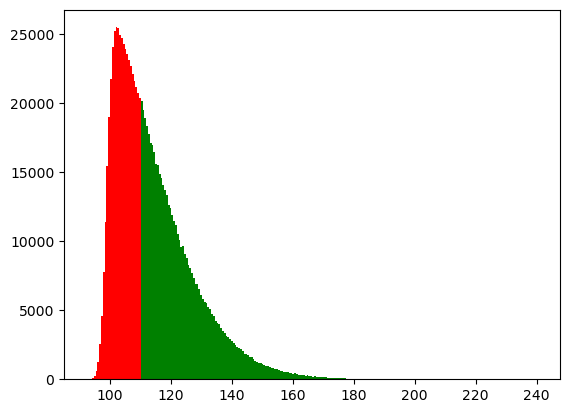

In [8]:
max_=np.max(paths,axis=0)
n, bins, patches = plt.hist(max_,bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

The price is calculated similarly to the vanilla option: lookback $$=e^{-r T}\left[\frac{1}{N} \sum_{i=1}^N\left(S_{\max }-K\right)^{+}\right]$$
Pricing a lookback with fixed strike of 110.

In [9]:
max_=np.max(paths,axis=0)
payoffs = np.maximum(max_-K, 0)
lookback_price = np.mean(payoffs)*np.exp(-r*T)
print(f"lookback price is {lookback_price}")

lookback price is 7.05762975168444
